In [73]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
from fbprophet.plot import add_changepoints_to_plot

In [74]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv (open/high/low/close/volume) data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [75]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=86400)
#one day in seconds
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['log'] = df['weightedAverage'].apply(np.log)

In [76]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y,log
0,896.000000,1483660800,1024.880000,870.000000,998.800000,6225.019034,5.718738e+06,918.669921,2017-01-06,918.669921,6.822927
4,907.100000,1484006400,915.832309,898.000000,903.000000,862.985185,7.839126e+05,908.373157,2017-01-10,908.373157,6.811655
8,817.477031,1484352000,836.040000,801.975002,827.000000,1348.387783,1.110991e+06,823.940432,2017-01-14,823.940432,6.714098
12,886.200000,1484697600,912.000000,850.000000,902.275793,2225.514487,1.959863e+06,880.633831,2017-01-18,880.633831,6.780642
16,924.119400,1485043200,939.060710,894.100100,925.706000,1706.434429,1.567170e+06,918.388676,2017-01-22,918.388676,6.822621
20,914.097671,1485388800,918.000000,892.667773,892.667773,1099.568637,9.975648e+05,907.232818,2017-01-26,907.232818,6.810399
24,918.000000,1485734400,920.000000,911.160522,913.000000,357.188021,3.275330e+05,916.976307,2017-01-30,916.976307,6.821082
28,1015.043154,1486080000,1023.000000,989.000000,1007.996997,1947.596629,1.960600e+06,1006.676773,2017-02-03,1006.676773,6.914410
32,1052.000000,1486425600,1055.294000,1020.600000,1022.699993,1056.148272,1.102652e+06,1044.030968,2017-02-07,1044.030968,6.950844
36,1000.500000,1486771200,1010.000000,984.100000,994.000000,1136.581604,1.135899e+06,999.399799,2017-02-11,999.399799,6.907155


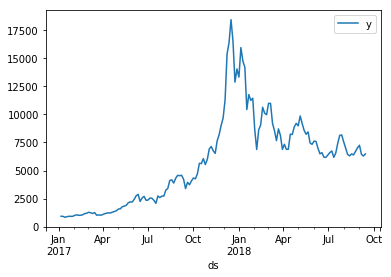

In [77]:
df.plot(x='ds',y='y')

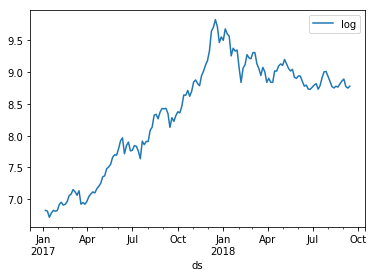

In [78]:
df.plot(x='ds',y='log')

## Kurtosis & Skew

In [79]:
df.y.kurtosis()

0.26197388607952155

A kurtosis this low (well below 3) means that there are less outliers than in a normal distribution.

In [80]:
df.y.skew()

0.7359020399288504

A skew > 0 means that the graph is asymmetric with a tail on the right.

## Prophet with various period values

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


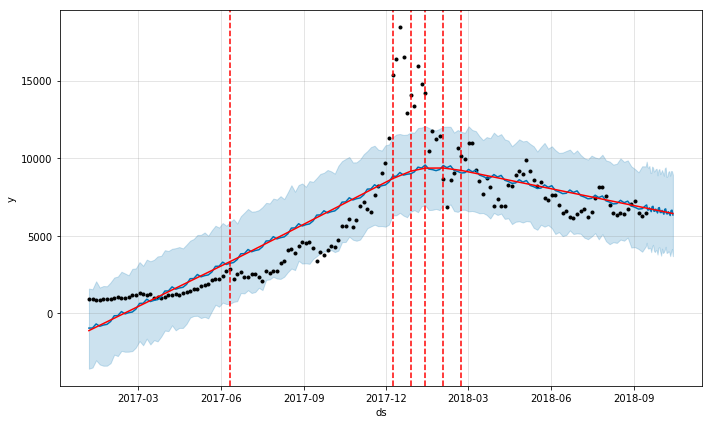

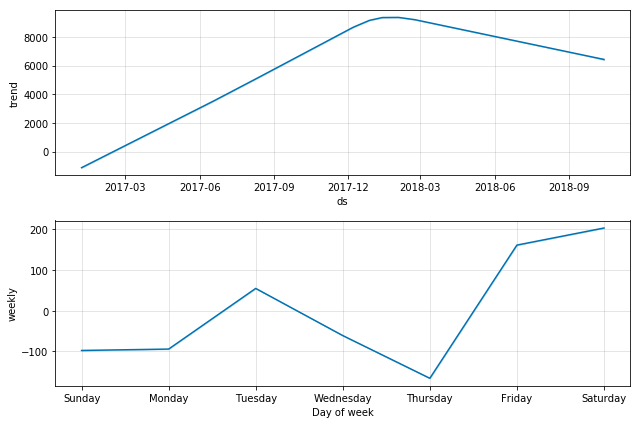

In [81]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=30) 
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


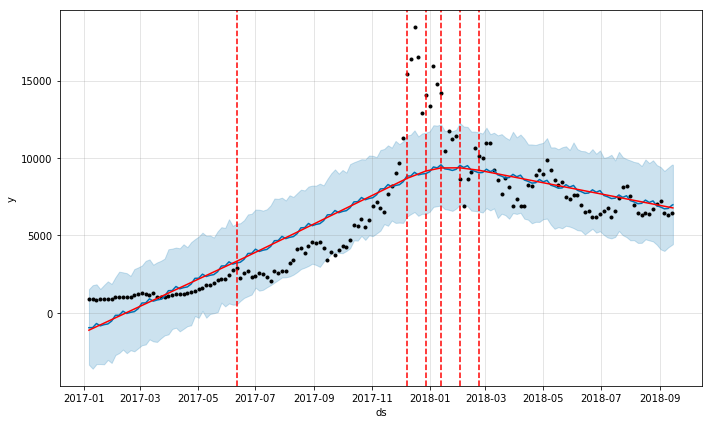

In [82]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

Linear Graphs


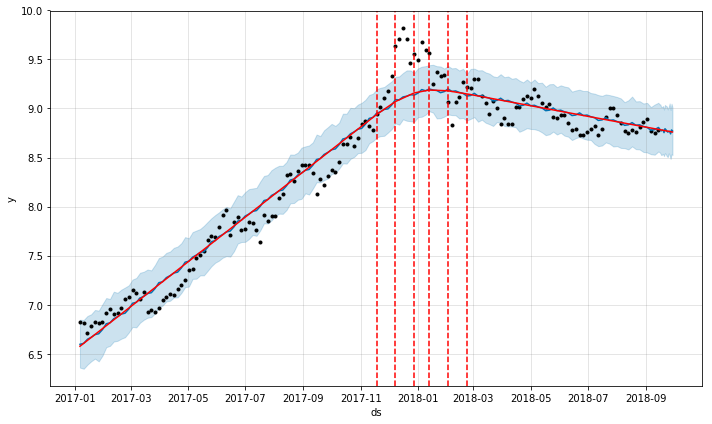

In [93]:
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


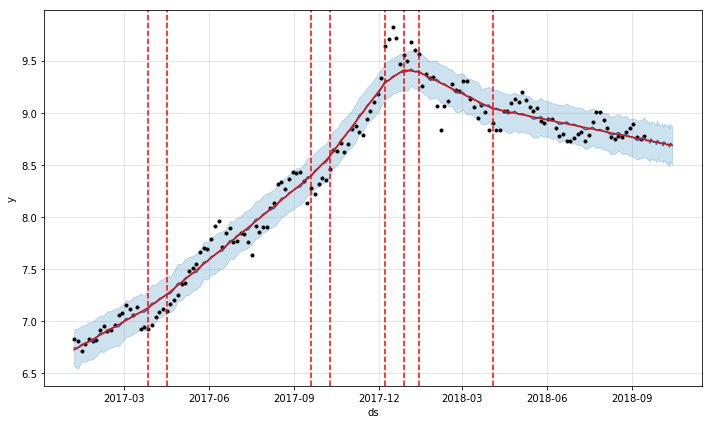

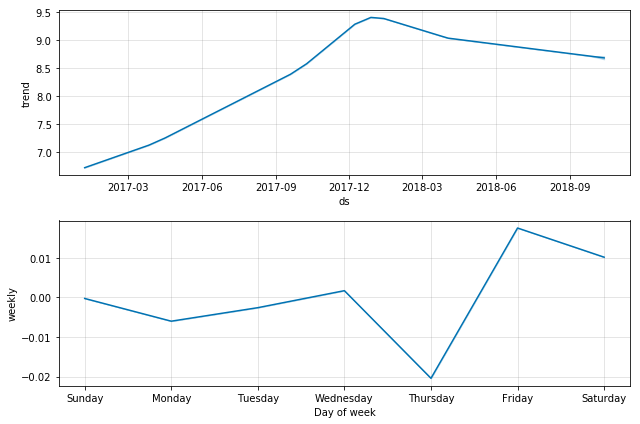

In [84]:
df['y'] = df['log']
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


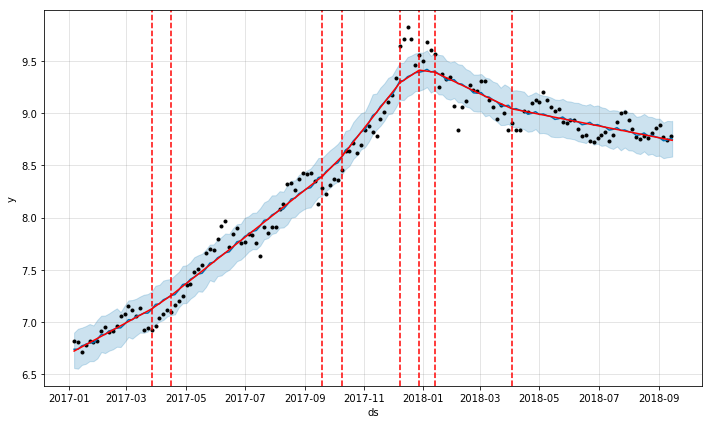

In [85]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

Log Graphs


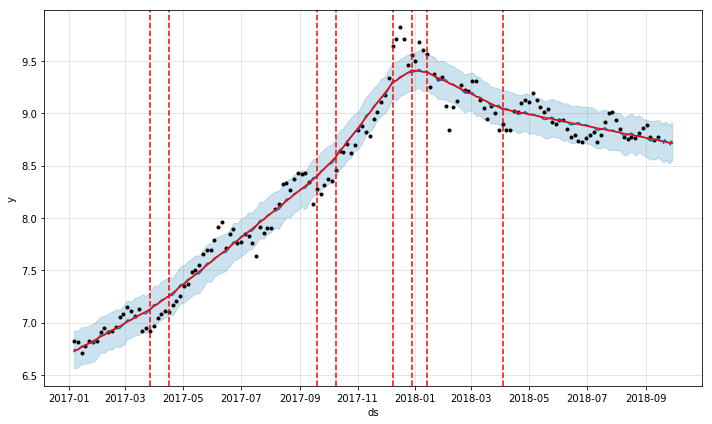

In [86]:
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

## Change Changepoint Scale

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


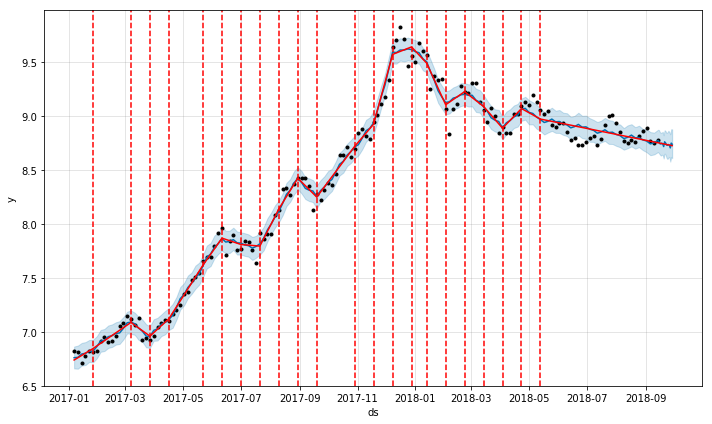

In [87]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


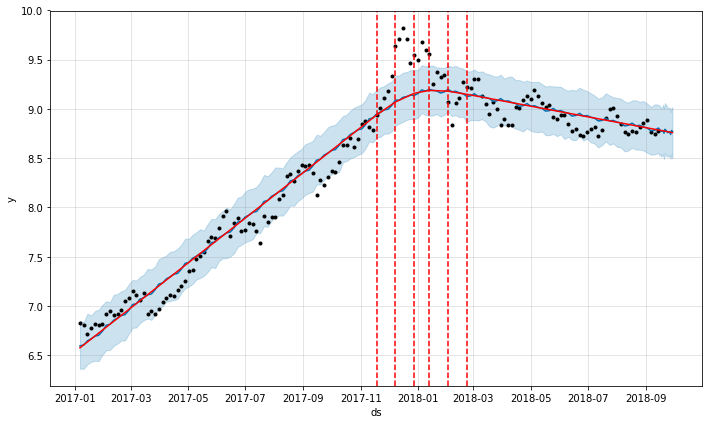

In [88]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Weekly Seasonality Analysis

May-September 2018

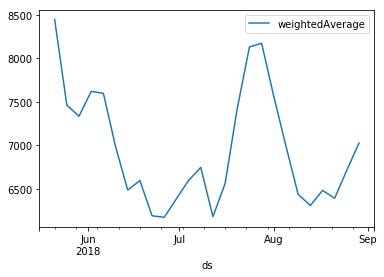

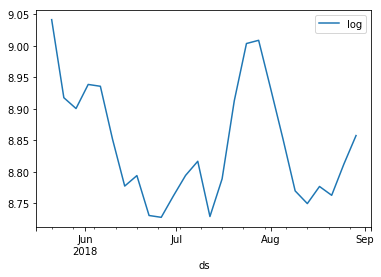

In [89]:
df2 = df.loc[500:600]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds',y='log')

February - May 2018

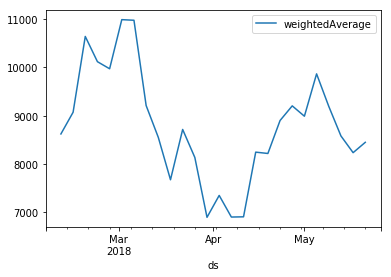

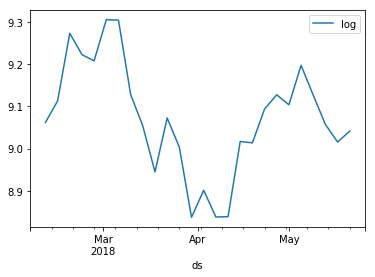

In [90]:
df2 = df.loc[400:500]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds',y='log')

November 2017- February 2018

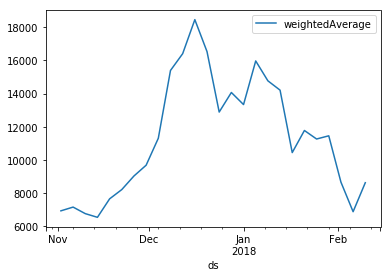

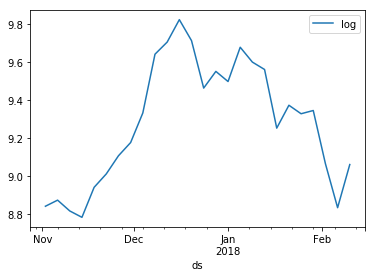

In [91]:
df2 = df.loc[300:400]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds', y ='log')